In [10]:
import numpy
import scipy, scipy.integrate, scipy.optimize
import matplotlib.pyplot as plt



In [2]:
def DoublePendulumDerivArray(vars,t,l1=1.,l2=1.,m1=1.,m2=1.,g=1.):
    """ variables are (theta1,theta2,omega1,omega2)
    parameters are the following: l1,l2,m1,m2,g
    if any are unspecified, they are taken to be equal to 1.
    
    returns array([dt_theta1,dt_theta2,dt_omega1,dt_omega2])
    
    Sample usage:
    DoublePendulumDerivArray((1,0,0,0),0,l1=2,l2=2,m1=1,m2=2,g=9.8)
    """
    (theta1,theta2,omega1,omega2)=vars        # Unpacks the variables
    dt_theta1=omega1
    dt_theta2=omega2
    s1=numpy.sin(theta1)
    s2=numpy.sin(theta2)
    cd=numpy.cos(theta1-theta2)
    sd=numpy.sin(theta1-theta2)
    #insurance against integer division
    l1=1.*l1
    m1=1.*m1
    num1=-(l2/l1)*omega2**2*sd-g*(1+m1/m2)*s1
    num2=(l1/l2)*omega1**2*sd-g*s2
    den=1.+m1/m2-cd**2
    dt_omega1=(num1-(l2/l1)*cd*num2)/den
    dt_omega2=((1+m1/m2)*num2-(l1/l2)*cd*num1)/den
    return numpy.array([dt_theta1,dt_theta2,dt_omega1,dt_omega2])

In [3]:
def doublependulumenergy(theta1,theta2,omega1,omega2,l1,l2,m1,m2,g):
    """ Returns the energy of a double pendulum """
    c1=numpy.cos(theta1)
    c2=numpy.cos(theta2)
    s1=numpy.sin(theta1)
    s2=numpy.sin(theta2)
    kin=(1/2)*m1*(l1*omega1)**2+(1/2)*m2*(l1*omega1*c1+l2*omega2*c2)**2+(1/2)*m2*(l1*omega1*s1+l2*omega2*s2)**2
    pot=-m1*g*l1*c1-m2*g*(l1*c1+l2*c2)
    return kin+pot

In [4]:
def DoublePendulumTrajectory(initial_theta1=0,initial_theta2=0,initial_omega1=0,initial_omega2=0,
    timestep=0.1,numstep=500,l1=1,l2=1,m1=1,m2=1,g=1) :
    """ Runs ODEint for the double pendulum 
    
    sample usage:
    DoublePendulumTrajectory(initial_theta1=0.1,l1=2,l2=2,m1=1,m2=2,g=9.8)
    
    Returns a dictionary which has the following keys:
    "times", "theta1", "theta2", "omega1", "omega2", "parameters"
    
    The values associated with the first five keys are a time series.
    The parameters key returns a dictionary which stores the parameters, plus the energy of the system
    """
    
    p={"l1":l1,"l2":l2,"m1":m1,"m2":m2,"g":g}
    
    
        
    # Create a tuple containing (l1,l2,m1,m2,g)
    partuple=(l1,l2,m1,m2,g)        # Converts parameters to a tuple in the right order
    # Create a tuple containing the inital values
    initial=(initial_theta1,initial_theta2,initial_omega1,initial_omega2)
    # Create the list of times
    tvals=numpy.arange(numstep)*timestep
    # Run odeint
    traj=scipy.integrate.odeint(DoublePendulumDerivArray,initial,tvals,partuple)
    # Store the results of odeint in a dictionary
    data={}
    data["times"]=tvals
    data["theta1"]=traj[:,0]
    data["theta2"]=traj[:,1]
    data["omega1"]=traj[:,2]
    data["omega2"]=traj[:,3]
    p["energy"]=doublependulumenergy(theta1=traj[0,0],theta2=traj[0,0],omega1=traj[0,0],omega2=traj[0,0],**p)
    data["parameters"]=p
    
    # Return the dictionary
    return data
    

In [5]:
def ShowDoublePendulumTrajectory(data):
    """ Call with a dictionary containing 
    "times", "theta1", "theta2", "omega1", "omega2","parameters"
    """
    parameters=data["parameters"]
    l1=parameters["l1"]
    l2=parameters["l2"]
    theta1=data["theta1"]
    theta2=data["theta2"]
    x1=l1*numpy.sin(theta1)
    y1=-l1*numpy.cos(theta1)
    x2=l2*numpy.sin(theta2)+x1
    y2=l2*numpy.sin(theta2)+y1
    pylab.scatter((0,),(0,))
    pylab.plot(x1,y1,'g',x2,y2,'r')
    pylab.show()
    return

In [6]:
def ShowDoublePendulumTimeSeries(data):
    """ Call with a dictionary containing 
    "times", "theta1", "theta2", "omega1", "omega2","parameters"
    """
    parameters=data["parameters"]
    l1=parameters["l1"]
    l2=parameters["l2"]
    theta1=data["theta1"]
    theta2=data["theta2"]
    x1=l1*numpy.sin(theta1)
    y1=-l1*numpy.cos(theta1)
    x2=l2*numpy.sin(theta2)+x1
    y2=l2*numpy.sin(theta2)+y1
    t=data["times"]
    pylab.plot(t,x1,'g+',t,y1,'g-',t,x2,'r+',t,y2,'r-')
    pylab.show()
    return    


def ShowDoublePendulumPoincare(data):
    """ Call with a dictionary containing 
    "times", "theta1", "theta2", "omega1", "omega2","parameters".
    
    Generates a Poincare section:
    plots omega2 vs theta2 when theta1=0 and omega1>0.
    """
    #unpack data
    parameters=data["parameters"]
    l1=parameters["l1"]
    l2=parameters["l2"]
    theta1=data["theta1"]
    theta2=data["theta2"]
    omega1=data["omega1"]
    omega2=data["omega2"]
    x1=l1*numpy.sin(theta1)
    y1=-l1*numpy.cos(theta1)
    x2=l2*numpy.sin(theta2)+x1
    y2=l2*numpy.sin(theta2)+y1
    t=data["times"]
    #bracket times where theta1 passes through n*2pi for some n, and with omega1>0
    thetasignprod=(numpy.sin(theta1[:-1])*numpy.sin(theta1[1:])<0)&(numpy.cos(theta1[:-1])>0)&(omega1[:-1]>0)
    signchangeloc=numpy.where(thetasignprod)[0]
    #interpolate between these bracketed times to find theta2 and omega2 at those times.
    theta2dat=numpy.array([lininterp(xvals=(numpy.sin(theta1[s]),numpy.sin(theta1[s+1])),yvals=(theta2[s],theta2[s+1])) for s in signchangeloc])
    omega2dat=numpy.array([lininterp(xvals=(numpy.sin(theta1[s]),numpy.sin(theta1[s+1])),yvals=(omega2[s],omega2[s+1])) for s in signchangeloc])
    #make a scatter plot
    pylab.scatter(theta2dat,omega2dat)
    return #signchangeloc,theta2dat,omega2dat

def lininterp(xvals,yvals):
    """ xvals and yvals are tuples of length 2:
    taking (x0,y0) and (x1,y1) to be points defining a line
    finds the value of y when x=0"""
    #print(xvals)
    return (xvals[1]*yvals[0]-xvals[0]*yvals[1])/(xvals[1]-xvals[0])
    

In [7]:
trial1=DoublePendulumTrajectory(initial_omega1=0.1,l1=1,l2=0.01,m1=1,m2=0.01,g=1,timestep=0.1,numstep=200)

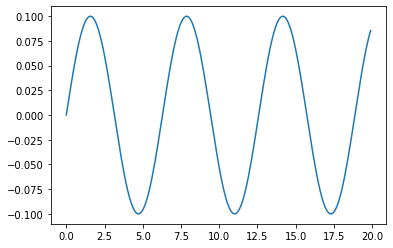

In [11]:
plt.plot(trial1["times"],trial1["theta1"])

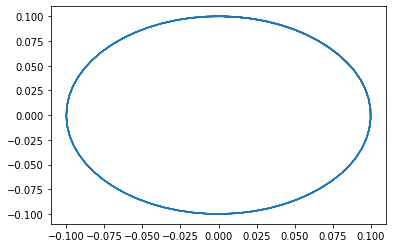

In [12]:
plt.plot(trial1["theta1"],trial1["omega1"])

In [15]:
traj1= DoublePendulumTrajectory(initial_omega1=0.1,timestep=0.1,numstep=2000)

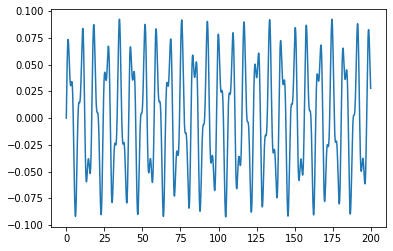

In [18]:
plt.plot(traj1["times"],traj1['theta1'])

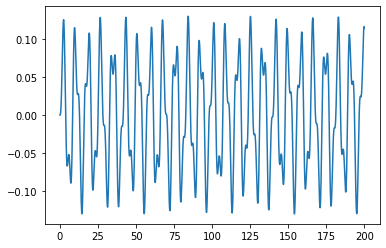

In [21]:
plt.plot(traj1["times"],traj1['theta2'])

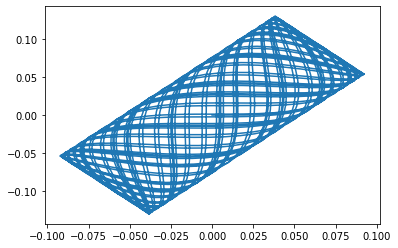

In [20]:
plt.plot(traj1['theta1'],traj1['theta2'])

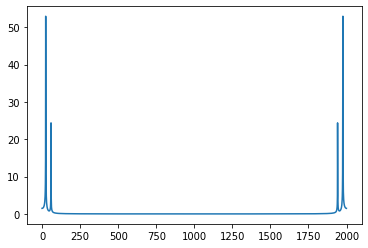

In [23]:
f1=scipy.fft(traj1["theta1"])
plt.plot(abs(f1))

In [25]:
traj2=DoublePendulumTrajectory(initial_omega1=0.1,initial_omega2=0.2,timestep=0.1,numstep=2000)

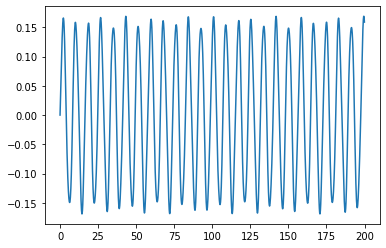

In [26]:
plt.plot(traj2["times"],traj2['theta1'])

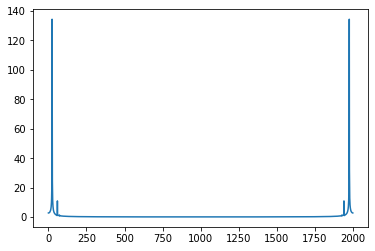

In [28]:
f2=scipy.fft(traj2["theta1"])
plt.plot(abs(f2))

In [29]:
longtraj1= DoublePendulumTrajectory(initial_omega1=0.1,timestep=0.1,numstep=60000)

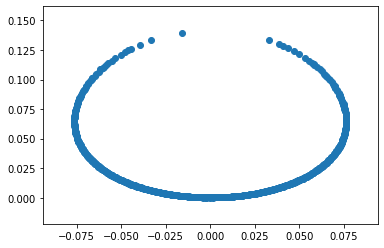

In [30]:
ShowDoublePendulumPoincare(longtraj1)

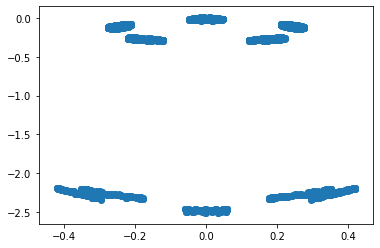

In [32]:
longtraj1= DoublePendulumTrajectory(initial_omega1=1.3,timestep=0.1,numstep=60000) 
ShowDoublePendulumPoincare(longtraj1)

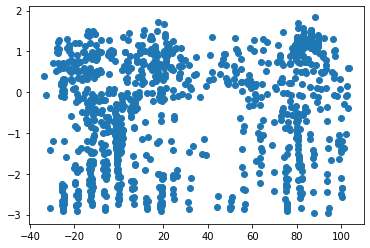

In [33]:
longtraj1= DoublePendulumTrajectory(initial_omega1=1.5,timestep=0.1,numstep=60000) 
ShowDoublePendulumPoincare(longtraj1)